# Visualization of temperature dependent functions
Within feature engineering, the average air temperature (`reanalysis_air_temp_c`) got modified by different functions to account for the performance and activity of the mosquitos. The temperature dependent fuctions were selected from the paper *"Thermal biology of mosquito-borne disease"* ([Mordecai et al. 2019, Ecology Letters](https://onlinelibrary.wiley.com/doi/full/10.1111/ele.13335)). Within this notebook the functions are compiled and plotted for illustration. 

## Setup

In [1]:
# Loading packages and their components
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Setup of the two basic functions: 
$$Briere: q T(T-Tmin)(Tmax-T)^{1/2}$$
$$Quadratic: -q(T-Tmin)(T-Tmax)$$

In [56]:
# briere function: q*T*[T-Tmin]*[Tmax-T]^(1/2)
def briere_function(q, T, Tmin, Tmax):
    return (q*T*(T-Tmin)*(Tmax-T)**(1/2))

# quadratic function: -q*[T-Tmin]*[T-Tmax]^(1/2)
def quadratic_function(q, T, Tmin, Tmax):
    return (-q*(T-Tmin)*(T-Tmax))

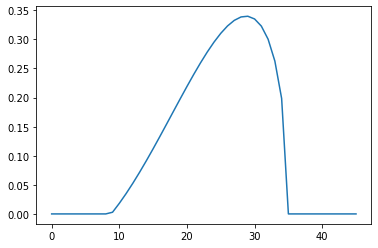

In [35]:
# get the biting rate for T from 5°C to 50°C for plotting
biting_rate=[]
for i in range(5, 51):
    x = briere_function(q=(2.02*(10**(-4))), T=i, Tmin=13.8, Tmax=40.0)
    biting_rate.append(x)
# replace negative values with 0
biting_rate = pd.Series(biting_rate)
biting_rate = biting_rate.clip(lower=0)
# plot 
plt.plot(biting_rate);

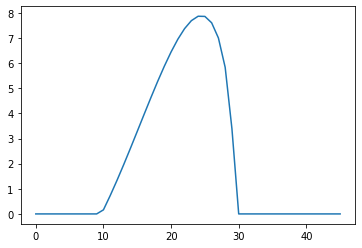

In [36]:
# get the fecundity for T from 5°C to 50°C for plotting
fecundity =[]
for i in range(5, 51):
    x = briere_function(q=(8.16*(10**(-3))), T=i, Tmin=14.7, Tmax=34.4)
    fecundity.append(x)
# replace negative values with 0
fecundity = pd.Series(fecundity)
fecundity = fecundity.clip(lower=0)
# plot
plt.plot(fecundity);

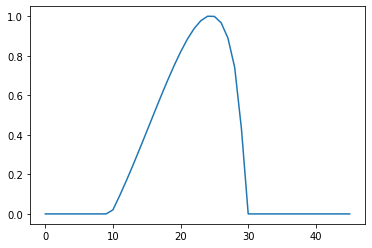

In [61]:
# get the relative fecundity for plotting (max = 1)
rel_fecundity = [i/fecundity.max() for i in fecundity]
plt.plot(rel_fecundity);

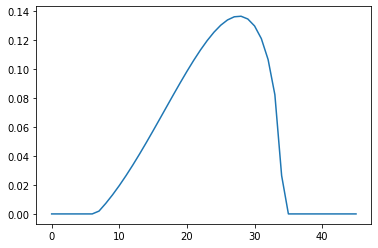

In [37]:
# get the Mosquito Dev. Rate (MDR) for T from 5°C to 50°C for plotting
mdr =[]
for i in range(5, 51):
    x = briere_function(q=(7.83*(10**(-5))), T=i, Tmin=11.6, Tmax=39.1)
    mdr.append(x)
# replace negative values with 0
mdr = pd.Series(mdr)
mdr = mdr.clip(lower=0)
# plot
plt.plot(mdr);

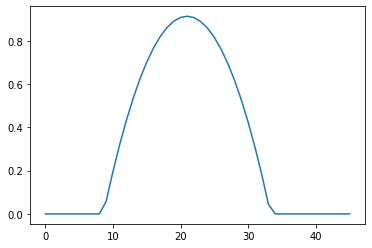

In [38]:
# get the immature survival for T from 5°C to 50°C for plotting
immature_survival =[]
for i in range(5, 51):
    x = quadratic_function(q=(5.99*(10**(-3))), T=i, Tmin=13.6, Tmax=38.3)
    immature_survival.append(x)
# replace negative values with 0
immature_survival = pd.Series(immature_survival)
immature_survival = immature_survival.clip(lower=0)
# plot
plt.plot(immature_survival);

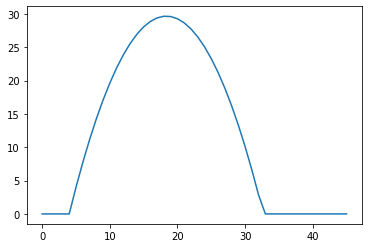

In [39]:
# get the lifespan for T from 5°C to 50°C for plotting
lifespan =[]
for i in range(5, 51):
    x = quadratic_function(q=(1.44*(10**(-1))), T=i, Tmin=9, Tmax=37.7)
    lifespan.append(x)
# replace negative values with 0
lifespan = pd.Series(lifespan)
lifespan = lifespan.clip(lower=0)
# plot
plt.plot(lifespan);

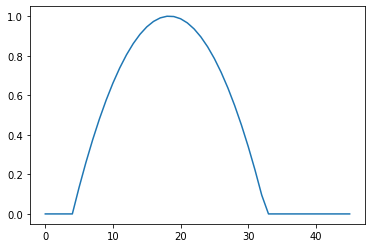

In [58]:
# get the relative lifespan for plotting (max = 1)
rel_lifespan = [i/lifespan.max() for i in lifespan]
plt.plot(rel_lifespan);

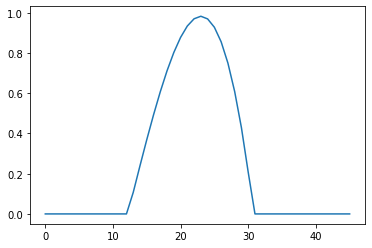

In [59]:
# get the transmission probability (A. aegypti) for T from 5°C to 50°C for plotting
transmission_aegypti = []
for i in range(5, 51):
    x = briere_function(q=(8.33*(10**(-4))), T=i, Tmin=17.2, Tmax=35.8)
    transmission_aegypti.append(x)
# replace negative values with 0
transmission_aegypti = pd.Series(transmission_aegypti)
transmission_aegypti = transmission_aegypti.clip(lower=0)
# plot
plt.plot(transmission_aegypti);

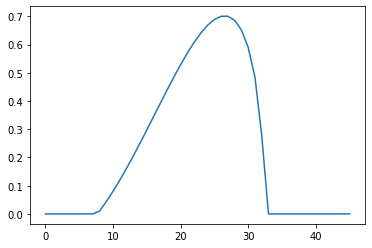

In [41]:
# get the infection probability (A. aegypti) for T from 5°C to 50°C for plotting
infection_aegypti = []
for i in range(5, 51):
    x = briere_function(q=(4.88*(10**(-4))), T=i, Tmin=12.7, Tmax=37.4)
    infection_aegypti.append(x)
# replace negative values with 0
infection_aegypti = pd.Series(infection_aegypti)
infection_aegypti = infection_aegypti.clip(lower=0)
# plot
plt.plot(infection_aegypti);

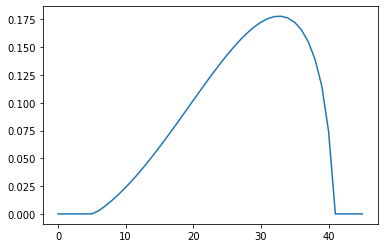

In [42]:
# get the Mosquito Dev. Rate (MDR) for T from 5°C to 50°C for plotting
pdr =[]
for i in range(5, 51):
    x = briere_function(q=(6.13*(10**(-5))), T=i, Tmin=10.3, Tmax=45.6)
    pdr.append(x)
# replace negative values with 0
pdr = pd.Series(pdr)
pdr = pdr.clip(lower=0)
# plot
plt.plot(pdr);

## Plot all functions together

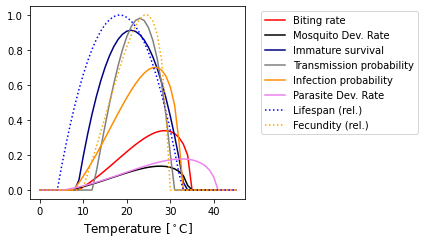

In [64]:
# plot all max<1 together
fig, ax = plt.subplots(figsize=(6, 3.5), tight_layout=True)

ax.plot(biting_rate, color='red');
ax.plot(mdr, color='black');
ax.plot(immature_survival, color='navy');
ax.plot(transmission_aegypti, color='gray');
ax.plot(infection_aegypti, color='darkorange');
ax.plot(pdr, color='violet');
ax.plot(rel_lifespan, color='blue', linestyle=':');
ax.plot(rel_fecundity, color='orange', linestyle=':');

ax.set_ylabel('')
ax.set_xlabel(r'Temperature [$^\circ$C]', fontsize=12)
ax.tick_params(labelsize=10)
ax.legend(labels=['Biting rate', 'Mosquito Dev. Rate', 'Immature survival', 'Transmission probability', 
                  'Infection probability', 'Parasite Dev. Rate', 'Lifespan (rel.)', 'Fecundity (rel.)'], fontsize=10,
             bbox_to_anchor=(1.05, 1), loc='upper left')

fig.savefig('plots/T_functions.png', facecolor='white', dpi=300)